In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faostat import faostat
import warnings
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

DATA_DIRECTORY = "datasets"
os.makedirs(DATA_DIRECTORY, exist_ok=True)

Using the `faostat` Python library to fetch data directly from the FAOSTAT API.
- **Crops (QCL)**: Production, Yield, and Harvested Area
- **Fertilizers (RFN)**: Fertilizers by Nutrient
- **Pesticides (RP)**: Pesticides Use

In [3]:
YEARS = list(range(2015, 2024))
FILTER = {"limit": -1, "year": YEARS}

# 1. Crops Data (QCL)
print("\nFetching Crops data (QCL)...")
df_crops = faostat.get_data_df("QCL", pars=FILTER)
print(f"Crops data fetched: {df_crops.shape}")
print(f"  Years: {df_crops['Year'].min()} - {df_crops['Year'].max()}")
print(f"  Unique crops: {df_crops['Item'].nunique()}")

# 2. Fertilizers Data (RFN - by Nutrient)
print("\nFetching Fertilizers data (RFN)...")
df_fertilizers_nutrient = faostat.get_data_df("RFN", pars=FILTER)
print(f"Fertilizers data fetched: {df_fertilizers_nutrient.shape}")

# 3. Pesticides Data (RP - Use)
print("\nFetching Pesticides data (RP)...")
df_pesticides_use = faostat.get_data_df("RP", pars=FILTER)
print(f"Pesticides data fetched: {df_pesticides_use.shape}")


Fetching Crops data (QCL)...
Crops data fetched: (633646, 12)
  Years: 2015 - 2023
  Unique crops: 300

Fetching Fertilizers data (RFN)...
Fertilizers data fetched: (45844, 12)

Fetching Pesticides data (RP)...
Pesticides data fetched: (28516, 12)


In [ ]:
print("Crop Production Data (QCL)")

print(f"\nColumns: {list(df_crops.columns)}")
display(df_crops.head())

print("\nUnique Elements:")
print(f"  Items (Crops): {df_crops['Item'].nunique()}")
print(f"  Elements: {df_crops['Element'].unique()}")
print(f"  Years: {df_crops['Year'].min()} - {df_crops['Year'].max()}")

Crop Production Data (QCL)

Columns: ['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value']


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, in shell",2015,2015,ha,14676
1,QCL,Crops and livestock products,2,Afghanistan,5412,Yield,221,"Almonds, in shell",2015,2015,kg/ha,1652.1
2,QCL,Crops and livestock products,2,Afghanistan,5510,Production,221,"Almonds, in shell",2015,2015,t,24246
3,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, in shell",2016,2016,ha,19481
4,QCL,Crops and livestock products,2,Afghanistan,5412,Yield,221,"Almonds, in shell",2016,2016,kg/ha,1685.9



Unique Elements:
  Items (Crops): 300
  Elements: ['Area harvested' 'Yield' 'Production' 'Stocks'
 'Producing Animals/Slaughtered' 'Yield/Carcass Weight' 'Laying'
 'Milk Animals']
  Years: 2015 - 2023


In [ ]:
df_yield = df_crops[df_crops['Element'].str.contains('Yield', case=False)].copy()

print(f"Yield data shape: {df_yield.shape}")
print(f"  Crops: {df_yield['Item'].nunique()}")
print(f"  Year range: {df_yield['Year'].min()} - {df_yield['Year'].max()}")

Yield data shape: (160173, 12)
  Crops: 193
  Year range: 2015 - 2023


In [ ]:
yield_cols = ['Area', 'Area Code', 'Item', 'Item Code', 'Year', 'Unit', 'Value']
df_yield = df_yield[yield_cols].copy()

df_yield.rename(columns={
    'Area': 'Country',
    'Area Code': 'Country_Code',
    'Item': 'Crop',
    'Item Code': 'Crop_Code',
    'Value': 'Yield'
}, inplace=True)

df_yield.head()

,Country,Country_Code,Crop,Crop_Code,Year,Unit,Yield
1,Afghanistan,2,"Almonds, in shell",221,2015,kg/ha,1652.1
4,Afghanistan,2,"Almonds, in shell",221,2016,kg/ha,1685.9
7,Afghanistan,2,"Almonds, in shell",221,2017,kg/ha,1378.8
10,Afghanistan,2,"Almonds, in shell",221,2018,kg/ha,1716.1
13,Afghanistan,2,"Almonds, in shell",221,2019,kg/ha,1308.3


In [ ]:
df_yield['Yield'] = pd.to_numeric(df_yield['Yield'], errors='coerce')
df_yield['Year'] = pd.to_numeric(df_yield['Year'], errors='coerce')

initial_len = len(df_yield)
df_yield = df_yield.dropna(subset=['Yield', 'Year'])
df_yield = df_yield[df_yield['Yield'] > 0]

print(f"Cleaned data: {len(df_yield):,} rows (dropped {initial_len - len(df_yield)} invalid)")

Cleaned data: 160,132 rows (dropped 41 invalid)


In [ ]:
df_pesticides_use

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,RP,Pesticides Use,3,Albania,5157,Agricultural Use,1357,Pesticides (total),2015,2015,t,538
1,RP,Pesticides Use,3,Albania,5159,Use per area of cropland,1357,Pesticides (total),2015,2015,kg/ha,0.77
2,RP,Pesticides Use,3,Albania,5172,Use per capita,1357,Pesticides (total),2015,2015,kg/cap,0.19
3,RP,Pesticides Use,3,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2015,2015,g/Int$,0.26
4,RP,Pesticides Use,3,Albania,5157,Agricultural Use,1357,Pesticides (total),2016,2016,t,584
...,...,...,...,...,...,...,...,...,...,...,...,...
28511,RP,Pesticides Use,5817,Net Food Importing Developing Countries (NFIDCs),5157,Agricultural Use,1355,Other Pesticides nes,2019,2019,t,3472
28512,RP,Pesticides Use,5817,Net Food Importing Developing Countries (NFIDCs),5157,Agricultural Use,1355,Other Pesticides nes,2020,2020,t,3976
28513,RP,Pesticides Use,5817,Net Food Importing Developing Countries (NFIDCs),5157,Agricultural Use,1355,Other Pesticides nes,2021,2021,t,4109
28514,RP,Pesticides Use,5817,Net Food Importing Developing Countries (NFIDCs),5157,Agricultural Use,1355,Other Pesticides nes,2022,2022,t,3864


In [20]:
df_pest = df_pesticides_use.copy()

pest_cols = ['Area', 'Area Code', 'Item', 'Year', 'Unit', 'Value']
df_pest = df_pest[pest_cols].copy()

df_pest.rename(columns={
    'Area': 'Country',
    'Area Code': 'Country_Code',
    'Item': 'Pesticide_Type',
    'Value': 'Pesticide_Use'
}, inplace=True)

df_pest['Pesticide_Use'] = pd.to_numeric(df_pest['Pesticide_Use'], errors='coerce')
df_pest = df_pest.dropna(subset=['Pesticide_Use'])

print(f"Pesticides data: {len(df_pest):,} rows")

Pesticides data: 28,516 rows


In [21]:
df_fertilizers_nutrient

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,RFN,Fertilizers by Nutrient,2,Afghanistan,5510,Production,3102,Nutrient nitrogen N (total),2015,2015,t,14416
1,RFN,Fertilizers by Nutrient,2,Afghanistan,5610,Import quantity,3102,Nutrient nitrogen N (total),2015,2015,t,78099.99
2,RFN,Fertilizers by Nutrient,2,Afghanistan,5910,Export quantity,3102,Nutrient nitrogen N (total),2015,2015,t,0
3,RFN,Fertilizers by Nutrient,2,Afghanistan,5157,Agricultural Use,3102,Nutrient nitrogen N (total),2015,2015,t,92516
4,RFN,Fertilizers by Nutrient,2,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),2015,2015,kg/ha,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...
45839,RFN,Fertilizers by Nutrient,5817,Net Food Importing Developing Countries (NFIDCs),5910,Export quantity,3104,Nutrient potash K2O (total),2023,2023,t,4251879.16
45840,RFN,Fertilizers by Nutrient,5817,Net Food Importing Developing Countries (NFIDCs),5157,Agricultural Use,3104,Nutrient potash K2O (total),2023,2023,t,1548904
45841,RFN,Fertilizers by Nutrient,5817,Net Food Importing Developing Countries (NFIDCs),5159,Use per area of cropland,3104,Nutrient potash K2O (total),2023,2023,kg/ha,4.95
45842,RFN,Fertilizers by Nutrient,5817,Net Food Importing Developing Countries (NFIDCs),5172,Use per capita,3104,Nutrient potash K2O (total),2023,2023,kg/cap,0.85


In [22]:
df_fert = df_fertilizers_nutrient.copy()

fert_cols = ['Area', 'Area Code', 'Item', 'Year', 'Unit', 'Value']
df_fert = df_fert[fert_cols].copy()

df_fert.rename(columns={
    'Area': 'Country',
    'Area Code': 'Country_Code',
    'Item': 'Fertilizer_Type',
    'Value': 'Fertilizer_Use'
}, inplace=True)

df_fert['Fertilizer_Use'] = pd.to_numeric(df_fert['Fertilizer_Use'], errors='coerce')
df_fert = df_fert.dropna(subset=['Fertilizer_Use'])

print(f"Fertilizers data processed: {len(df_fert):,} rows")

Fertilizers data processed: 45,844 rows


In [23]:
df_yield = df_yield_info.copy()

df_yield["Yield_scaled"] = scaler.fit_transform(df_yield[["Yield"]])

df_yield.head()



,Country,Country_Code,Crop,Crop_Code,Year,Unit,Yield,Yield_scaled
0,Afghanistan,2,"Almonds, in shell",221,2015,kg/ha,1652.1,-0.361153
1,Afghanistan,2,"Almonds, in shell",221,2016,kg/ha,1685.9,-0.359706
2,Afghanistan,2,"Almonds, in shell",221,2017,kg/ha,1378.8,-0.372850
3,Afghanistan,2,"Almonds, in shell",221,2018,kg/ha,1716.1,-0.358414
4,Afghanistan,2,"Almonds, in shell",221,2019,kg/ha,1308.3,-0.375868


In [36]:
df_pest = df_pesticides_info.copy()

df_pest["Pesticide_Use_scaled"] = scaler.fit_transform(df_pest[["Pesticide_Use"]])

df_pest.head()



,Country,Country_Code,Pesticide_Type,Year,Unit,Pesticide_Use,Pesticide_Use_scaled
0,Albania,3,Pesticides (total),2015,t,538.00,-0.100189
1,Albania,3,Pesticides (total),2015,kg/ha,0.77,-0.105982
2,Albania,3,Pesticides (total),2015,kg/cap,0.19,-0.105988
3,Albania,3,Pesticides (total),2015,g/Int$,0.26,-0.105987
4,Albania,3,Pesticides (total),2016,t,584.00,-0.099693


In [41]:
df_fertilizers = df_fertilizers_info.copy()

df_fertilizers["Fertilizer_Use_scaled"] = scaler.fit_transform(df_fertilizers[["Fertilizer_Use"]])
df_fert=df_fertilizers.copy()
df_fertilizers.head()



,Country,Country_Code,Fertilizer_Type,Year,Unit,Fertilizer_Use,Fertilizer_Use_scaled
0,Afghanistan,2,Nutrient nitrogen N (total),2015,t,14416.00,-0.154604
1,Afghanistan,2,Nutrient nitrogen N (total),2015,t,78099.99,-0.137836
2,Afghanistan,2,Nutrient nitrogen N (total),2015,t,0.00,-0.158400
3,Afghanistan,2,Nutrient nitrogen N (total),2015,t,92516.00,-0.134040
4,Afghanistan,2,Nutrient nitrogen N (total),2015,kg/ha,11.70,-0.158397


In [26]:
df_yield['Yield'].describe()

count    1.601320e+05
mean     1.008996e+04
std      2.336376e+04
min      1.000000e-01
25%      1.019600e+03
50%      3.938200e+03
75%      1.200000e+04
max      1.441139e+06
Name: Yield, dtype: float64

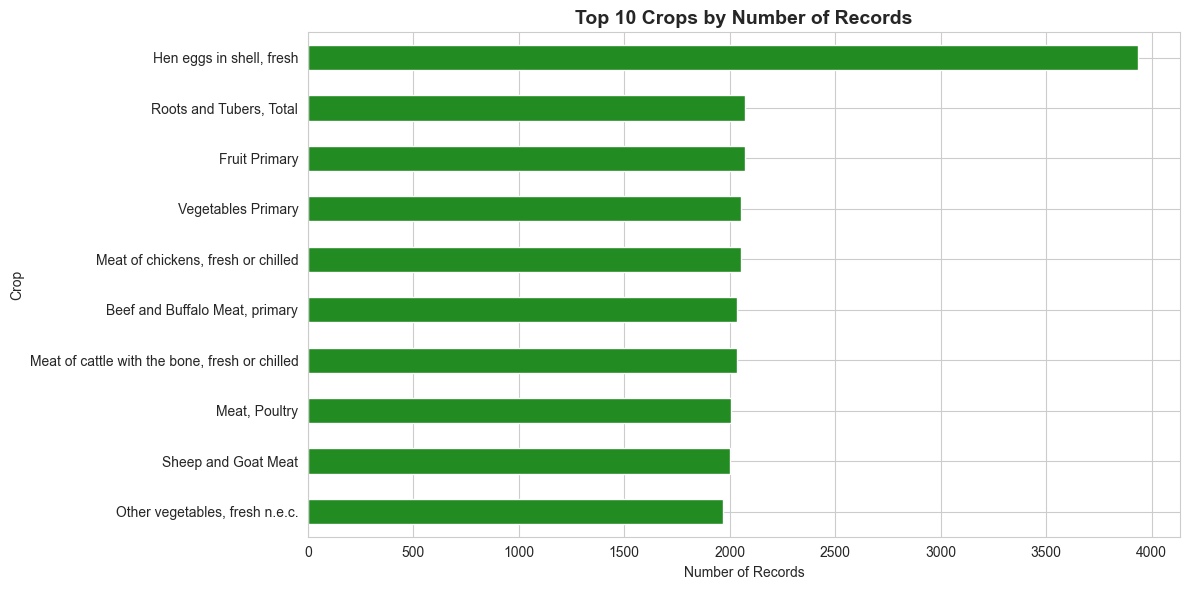

In [ ]:
top_crops = df_yield['Crop'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_crops.plot(kind='barh', color='forestgreen')
plt.title('Top 10 Crops by Number of Records', fontsize=14, fontweight='bold')
plt.xlabel('Number of Records')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

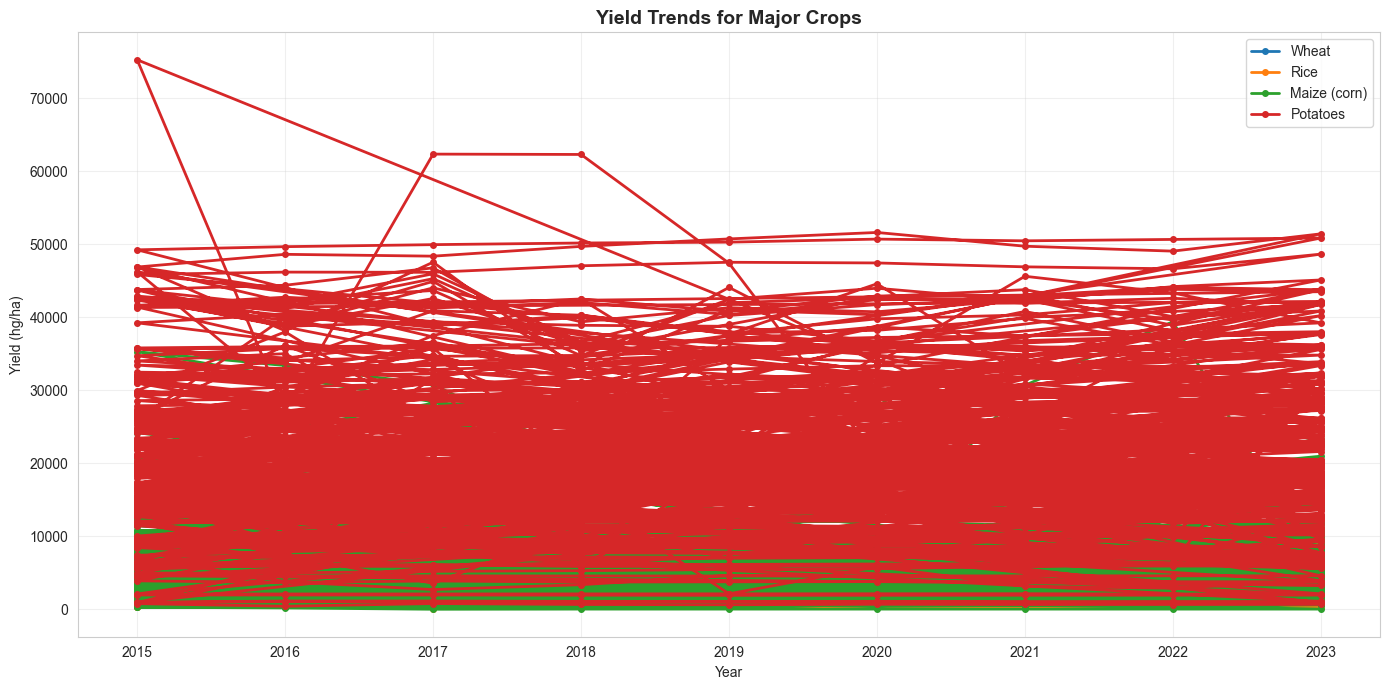

In [ ]:
major_crops = ['Wheat', 'Rice', 'Maize (corn)', 'Soybeans', 'Potatoes']

available_crops = [c for c in major_crops if c in df_yield['Crop'].unique()]

plt.figure(figsize=(14, 7))
for crop in available_crops:
    crop_data = df_yield[df_yield['Crop'] == crop]
    plt.plot(crop_data['Year'], crop_data['Yield'], marker='o', label=crop, linewidth=2, markersize=4)

plt.title('Yield Trends for Major Crops', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

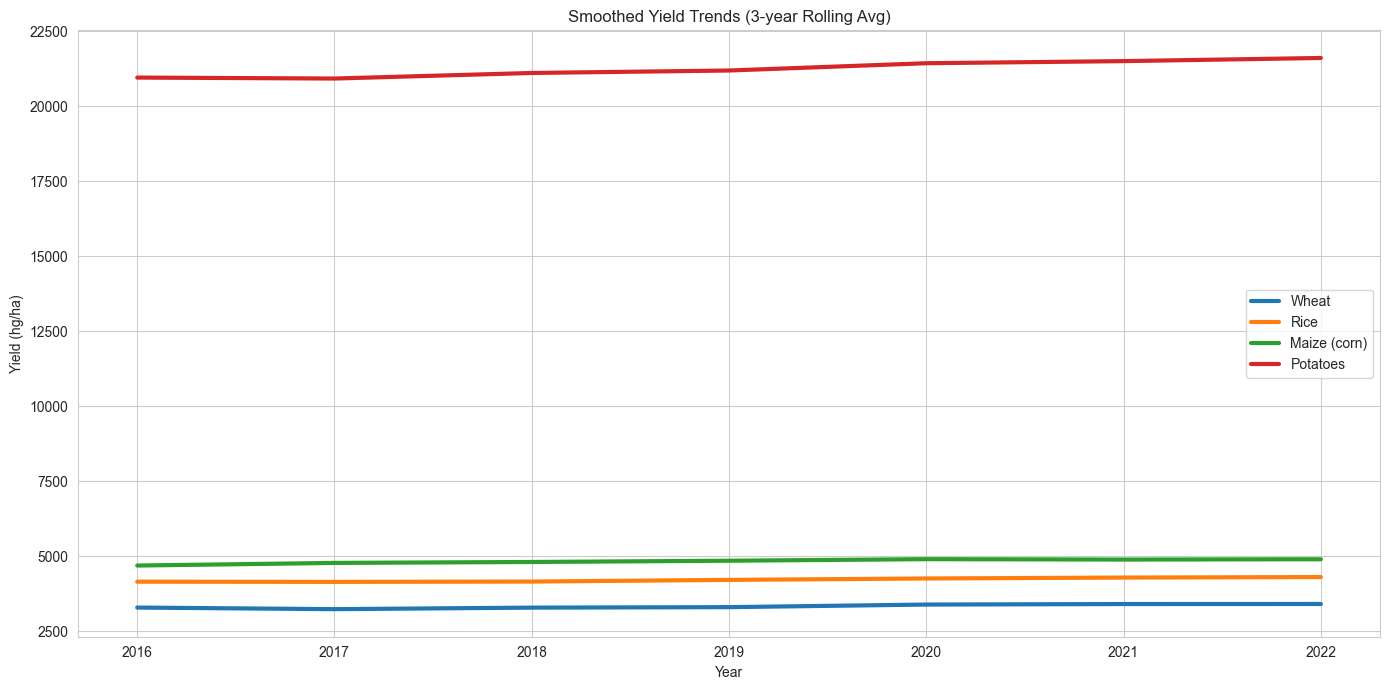

In [ ]:
plt.figure(figsize=(14, 7))

for crop in available_crops:
    crop_data = df_yield[df_yield['Crop'] == crop]
    avg_yearly = crop_data.groupby('Year')['Yield'].mean().reset_index()
    
    avg_yearly['Smooth'] = avg_yearly['Yield'].rolling(3, center=True).mean()
    
    plt.plot(avg_yearly['Year'], avg_yearly['Smooth'], linewidth=3, label=crop)

plt.title('Smoothed Yield Trends (3-year Rolling Avg)')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


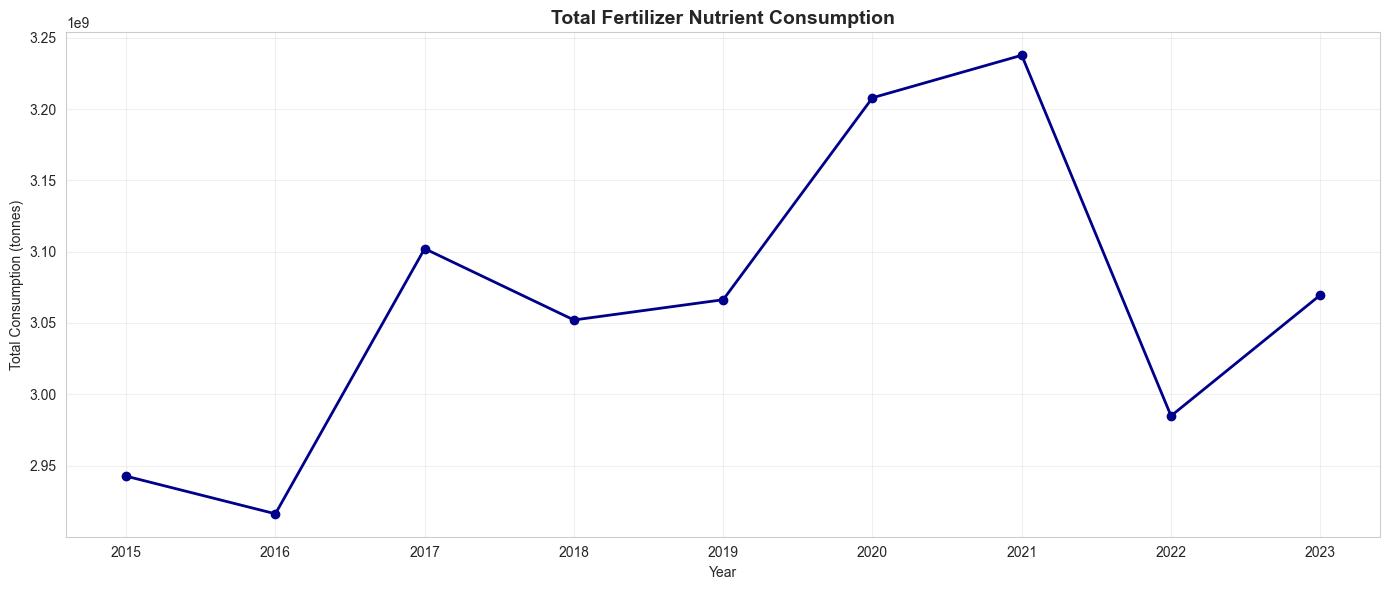

In [ ]:
fert_total = df_fert.groupby('Year')['Fertilizer_Use'].sum()

plt.figure(figsize=(14, 6))
plt.plot(fert_total.index, fert_total.values, marker='o', color='darkblue', linewidth=2)
plt.title('Total Fertilizer Nutrient Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Consumption (tonnes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

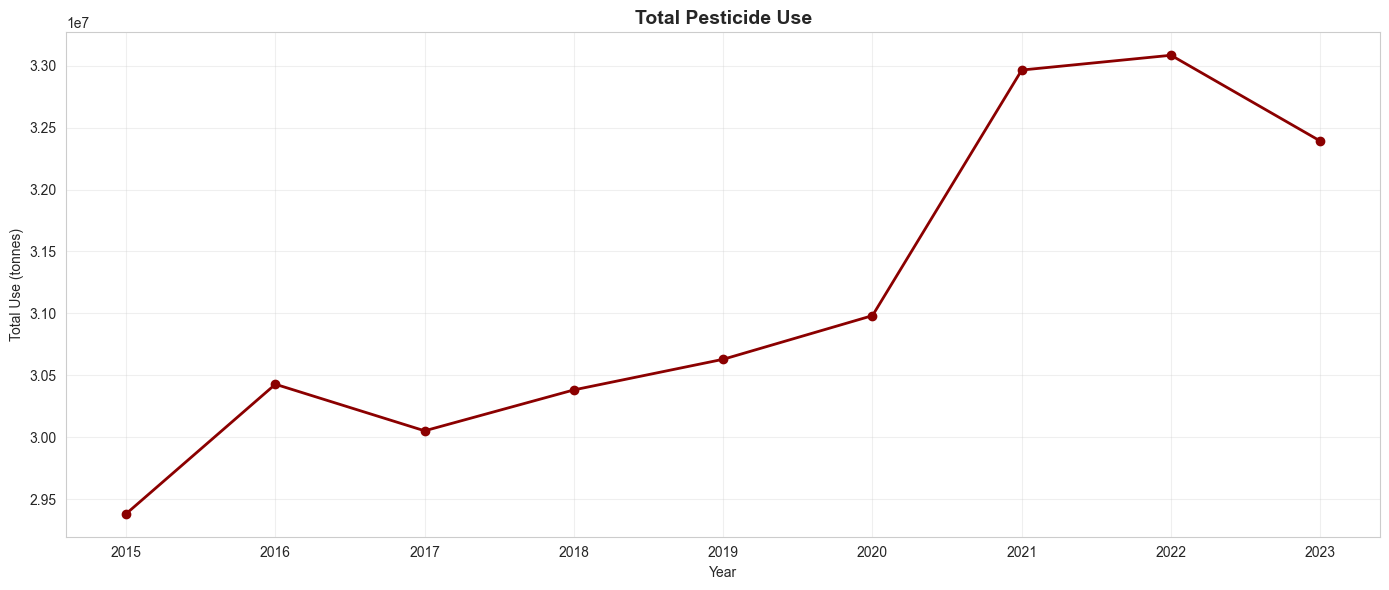

In [ ]:
pest_total = df_pest.groupby('Year')['Pesticide_Use'].sum()

plt.figure(figsize=(14, 6))
plt.plot(pest_total.index, pest_total.values, marker='o', color='darkred', linewidth=2)
plt.title('Total Pesticide Use', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Use (tonnes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Save Processed Data

In [42]:
yield_output = os.path.join(DATA_DIRECTORY, 'faostat_yield_processed.csv')
df_yield.to_csv(yield_output, index=False)

pest_output = os.path.join(DATA_DIRECTORY, 'faostat_pesticides_processed.csv')
df_pest.to_csv(pest_output, index=False)

fert_output = os.path.join(DATA_DIRECTORY, 'faostat_fertilizers_processed.csv')
df_fert.to_csv(fert_output, index=False)

In [44]:
import os


yield_file = os.path.join(DATA_DIRECTORY, 'faostat_yield_processed.csv')
pesticides_file = os.path.join(DATA_DIRECTORY, 'faostat_pesticides_processed.csv')
fertilizers_file = os.path.join(DATA_DIRECTORY, 'faostat_fertilizers_processed.csv')


df_yield_info = pd.read_csv(yield_file)
df_pesticides_info = pd.read_csv(pesticides_file)
df_fertilizers_info = pd.read_csv(fertilizers_file)


print("Yield Data Columns:")
df_yield_info.info()

print("\nPesticides Data Columns:")
df_pesticides_info.info()



Yield Data Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160132 entries, 0 to 160131
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       160132 non-null  object 
 1   Country_Code  160132 non-null  int64  
 2   Crop          160132 non-null  object 
 3   Crop_Code     160132 non-null  int64  
 4   Year          160132 non-null  int64  
 5   Unit          160132 non-null  object 
 6   Yield         160132 non-null  float64
 7   Yield_scaled  160132 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 9.8+ MB

Pesticides Data Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28516 entries, 0 to 28515
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               28516 non-null  object 
 1   Country_Code          28516 non-null  int64  
 2   Pesticide_Type        285

In [45]:
df_fertilizers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45844 entries, 0 to 45843
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                45844 non-null  object 
 1   Country_Code           45844 non-null  int64  
 2   Fertilizer_Type        45844 non-null  object 
 3   Year                   45844 non-null  int64  
 4   Unit                   45844 non-null  object 
 5   Fertilizer_Use         45844 non-null  float64
 6   Fertilizer_Use_scaled  45844 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ MB
